# Linear regression

Code from : https://towardsdatascience.com/linear-regression-from-scratch-cd0dee067f72

In [5]:
#!pip install matplotlib

In [3]:
#import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('https://github.com/FeezyHendrix/LinearRegressionfromscrath/raw/master/dataset.csv')

In [4]:
dataset

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


# Algorithme pour trouver la droite passant au plus proche des points

Schéma de ce que l'on cherche :

![](https://miro.medium.com/max/355/1*LxQraU40CdL9Qd9uSsq_xg.gif)

On veut réduire l'écart entre notre droite et les points du jeux de données.

Soit r un écart, l'erreur va se mesurer :
![](https://miro.medium.com/max/77/1*XTTjSJv7nogDk-Us9zWvRw.jpeg)

L'algorithme que nous allons utiliser est celui du moindre carré :

![](http://serge.mehl.free.fr/anx/anx_gif/meth_c12.gif)

In [5]:
dataset['Head Size(cm^3)'].values

array([4512, 3738, 4261, 3777, 4177, 3585, 3785, 3559, 3613, 3982, 3443,
       3993, 3640, 4208, 3832, 3876, 3497, 3466, 3095, 4424, 3878, 4046,
       3804, 3710, 4747, 4423, 4036, 4022, 3454, 4175, 3787, 3796, 4103,
       4161, 4158, 3814, 3527, 3748, 3334, 3492, 3962, 3505, 4315, 3804,
       3863, 4034, 4308, 3165, 3641, 3644, 3891, 3793, 4270, 4063, 4012,
       3458, 3890, 4166, 3935, 3669, 3866, 3393, 4442, 4253, 3727, 3329,
       3415, 3372, 4430, 4381, 4008, 3858, 4121, 4057, 3824, 3394, 3558,
       3362, 3930, 3835, 3830, 3856, 3249, 3577, 3933, 3850, 3309, 3406,
       3506, 3907, 4160, 3318, 3662, 3899, 3700, 3779, 3473, 3490, 3654,
       3478, 3495, 3834, 3876, 3661, 3618, 3648, 4032, 3399, 3916, 4430,
       3695, 3524, 3571, 3594, 3383, 3499, 3589, 3900, 4114, 3937, 3399,
       4200, 4488, 3614, 4051, 3782, 3391, 3124, 4053, 3582, 3666, 3532,
       4046, 3667, 2857, 3436, 3791, 3302, 3104, 3171, 3572, 3530, 3175,
       3438, 3903, 3899, 3401, 3267, 3451, 3090, 34

In [6]:
%%timeit
# initializing our inputs and outputs
X = dataset['Head Size(cm^3)'].values
Y = dataset['Brain Weight(grams)'].values# mean of our inputs and outputs
x_mean = np.mean(X)
y_mean = np.mean(Y)#total number of values
n = len(X)# using the formula to calculate the b1 and b0
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2
    
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)#printing the coefficient

3.55 ms ± 48.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [29]:
print(b1, b0)

0.2634293394893993 325.5734210494428


## Comment aller plus vite ?

Nous faison une boucle sur tous les points pour y faire la même opération.

Pour aller plus vite, nous pouvons transformer cette boucle en un calcul matriciel.




In [11]:
#%%timeit
# initializing our inputs and outputs
X = dataset['Head Size(cm^3)'].values
Y = dataset['Brain Weight(grams)'].values# mean of our inputs and outputs
x_mean = np.mean(X)
y_mean = np.mean(Y)#total number of values
n = len(X)# using the formula to calculate the b1 and b0
numerator = (X - x_mean) * (Y - y_mean)
denominator = (X - x_mean) ** 2

b1 = numerator.sum() / denominator.sum()
b0 = y_mean - (b1 * x_mean)#printing the coefficient

In [12]:
print(b1, b0)

0.2634293394893993 325.5734210494428


Le résultat est le même mais on est 100 fois plus rapide !

Le calcul matriciel est accéléré en Python car il est exécuté par du code compilé.

Mais surtout les GPU sont très fort en calcul matriciel, ce qui permet d'aller encore plus vite en utilisant des librairies GPU.

# Affichage de la droite trouvée

In [13]:
X

array([4512, 3738, 4261, 3777, 4177, 3585, 3785, 3559, 3613, 3982, 3443,
       3993, 3640, 4208, 3832, 3876, 3497, 3466, 3095, 4424, 3878, 4046,
       3804, 3710, 4747, 4423, 4036, 4022, 3454, 4175, 3787, 3796, 4103,
       4161, 4158, 3814, 3527, 3748, 3334, 3492, 3962, 3505, 4315, 3804,
       3863, 4034, 4308, 3165, 3641, 3644, 3891, 3793, 4270, 4063, 4012,
       3458, 3890, 4166, 3935, 3669, 3866, 3393, 4442, 4253, 3727, 3329,
       3415, 3372, 4430, 4381, 4008, 3858, 4121, 4057, 3824, 3394, 3558,
       3362, 3930, 3835, 3830, 3856, 3249, 3577, 3933, 3850, 3309, 3406,
       3506, 3907, 4160, 3318, 3662, 3899, 3700, 3779, 3473, 3490, 3654,
       3478, 3495, 3834, 3876, 3661, 3618, 3648, 4032, 3399, 3916, 4430,
       3695, 3524, 3571, 3594, 3383, 3499, 3589, 3900, 4114, 3937, 3399,
       4200, 4488, 3614, 4051, 3782, 3391, 3124, 4053, 3582, 3666, 3532,
       4046, 3667, 2857, 3436, 3791, 3302, 3104, 3171, 3572, 3530, 3175,
       3438, 3903, 3899, 3401, 3267, 3451, 3090, 34

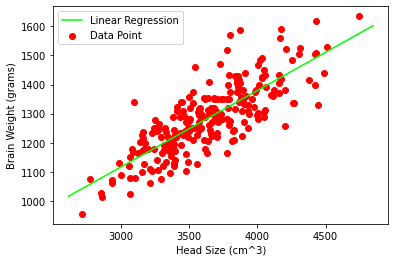

In [20]:
# plotting values 
x_max = np.max(X) + 100
x_min = np.min(X) - 100 

# calculating line values of x and y
x = np.linspace(x_min, x_max, 10)
y = b1 * x + b0 #plotting line 

plt.plot(x, y, color='#00ff00', label='Linear Regression')#plot the data point

plt.scatter(X, Y, color='#ff0000', label='Data Point')# x-axis label
plt.xlabel('Head Size (cm^3)')#y-axis label
plt.ylabel('Brain Weight (grams)')
plt.legend()
plt.show()

In [21]:
b1 * 3600 + b0

1273.9190432112803

# Evaluation de notre modèle



![](https://miro.medium.com/max/327/1*SGBsn7WytmYYbuTgDatIpw.gif)

In [12]:
rmse = 0
for i in range(n):
    y_pred=  b0 + b1* X[i]
    rmse += (Y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/n)
print(rmse)

72.1206213783709


![](https://miro.medium.com/max/318/1*eebOVNcNlkwqM-fWjzmOLg.gif)

In [15]:
sumofsquares = 0
sumofresiduals = 0

for i in range(n) :
    y_pred = b0 + b1 * X[i]
    sumofsquares += (Y[i] - y_mean) ** 2
    sumofresiduals += (Y[i] - y_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)
print(score)

0.6393117199570003
